**HEART DISEASE PREDICTION USING MACHINE LEARNING**

In [2]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.4 MB 24 kB/s 


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!ls


gdrive	sample_data


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
!ls

gdrive	sample_data


In [5]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

'bestsellers with categories.csv'   catboost_info   heart.csv   kaggle.json


In [ ]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 469kB/s]


In [ ]:
!ls

'bestsellers with categories.csv'   heart-disease-uci.zip   kaggle.json


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [6]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
df.isnull().values.any()

False

**EXPLORATORY DATA ANALYSIS**

**1.) AGES STATS IN DATASET**

Min Age :  29
Max Age : 77
Mean Age :  54.366336633663366
*************************************
Young: 16
Middle: 128
Elder: 151


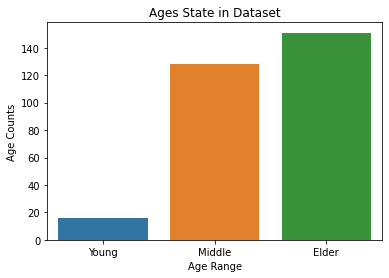

In [ ]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age : ', minAge)
print('Max Age :', maxAge)
print('Mean Age : ', meanAge)
print('*************************************')
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]
print("Young:", len(Young))
print('Middle:',len(Middle))
print('Elder:',len(Elder))

sns.barplot(x=['Young', 'Middle', 'Elder'], y=[len(Young), len(Middle), len(Elder)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

**2.) GENDER STATS**

In [ ]:
#plotting sex
total_genders_count=len(df.sex)
male_count=len(df[df['sex']==1])
female_count=len(df[df['sex']==0])
print('Total Genders:', total_genders_count)
print('Male count:', male_count)
print('Female Count',female_count)

Total Genders: 303
Male count: 207
Female Count 96


In [ ]:
print('Male State: {:.2f}%'.format((male_count / (total_genders_count)*100)))
print('Female State: {:.2f}%'.format((female_count / (total_genders_count)*100)))


Male State: 68.32%
Female State: 31.68%


**3.) CORRELATION MATRIX**

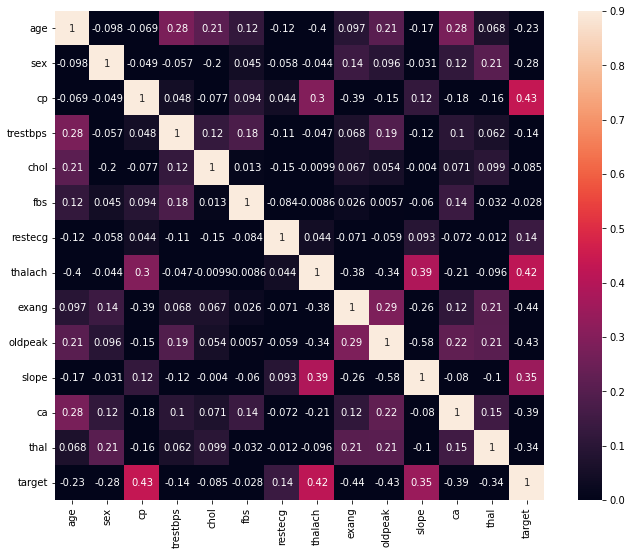

In [ ]:
#correlation matrix
cormat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cormat,vmax=0.9,vmin=0,square=True,annot=True)

**4.) CORRELATION WITH TARGET FEATURE**

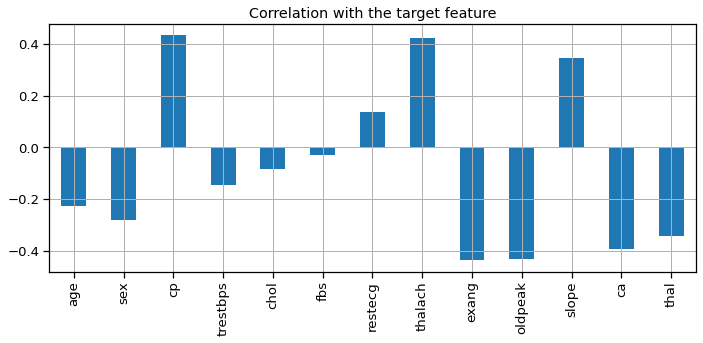

In [ ]:
#correlation with target
sns.set_context('notebook', font_scale=1.2)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,5), title="Correlation with the target feature")
plt.tight_layout()

**5.) PLOTTING TARGET VARIABLE**

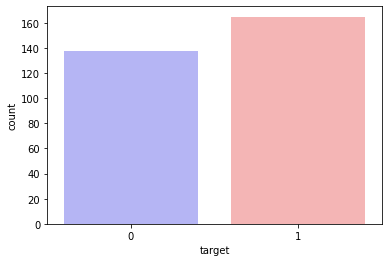

In [7]:
#plotting target variable
sns.countplot(x='target', data=df, palette="bwr")
plt.show()

**6.) DISTRIBUTION OF AGE**

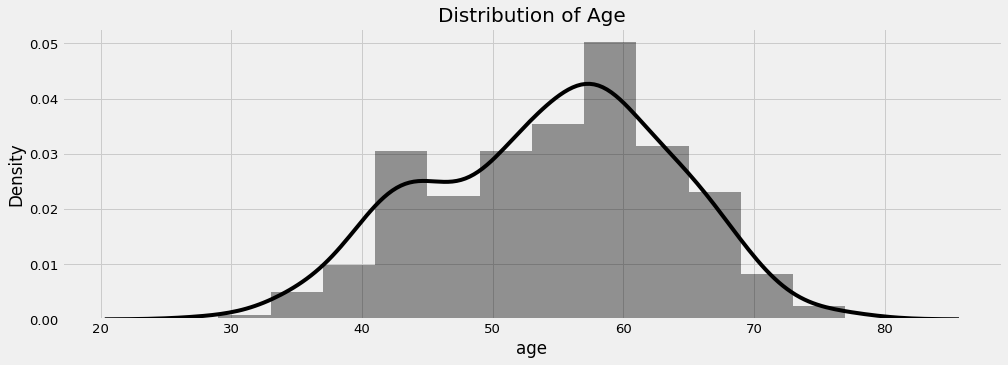

In [ ]:
#Distribution of Age
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(df['age'], color='black')
plt.title('Distribution of Age', fontsize=20)
plt.show()

**6.) MALE VS FEMALE PERCENTAGES**

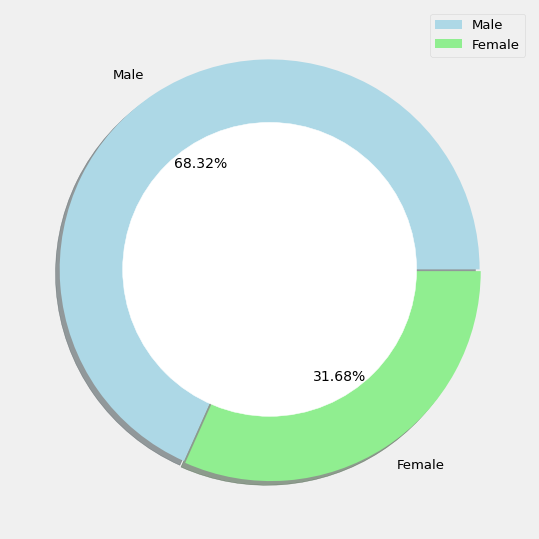

In [ ]:
size = df['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode=[0,0.01]

my_circle=plt.Circle((0,0), 0.7, color='white')

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

**7.) RELATION OF TRESTBPS WITH TARGET**

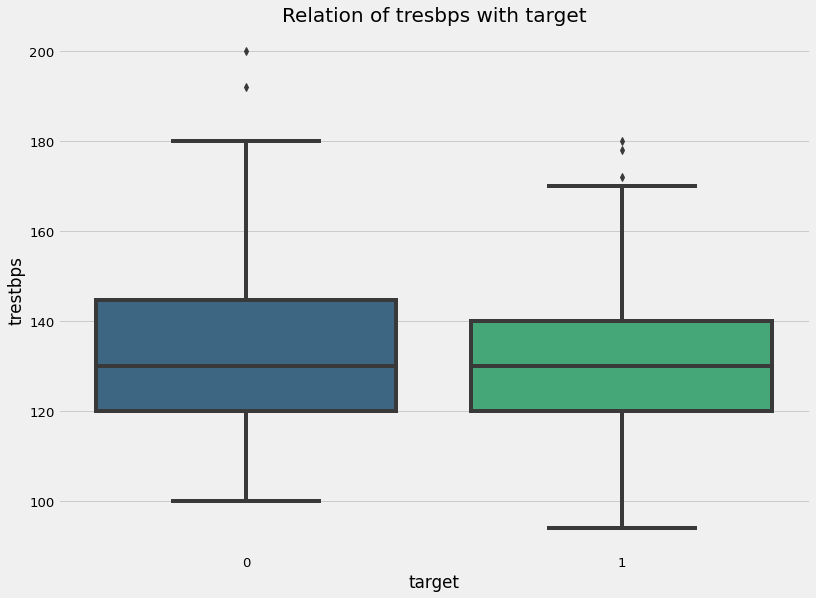

In [ ]:
#Relation of tresbps with target
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['target'], df['trestbps'], palette='viridis')
plt.title('Relation of tresbps with target', fontsize=20)
plt.show()

**8.) RELATION OF AGE AND TARGET**

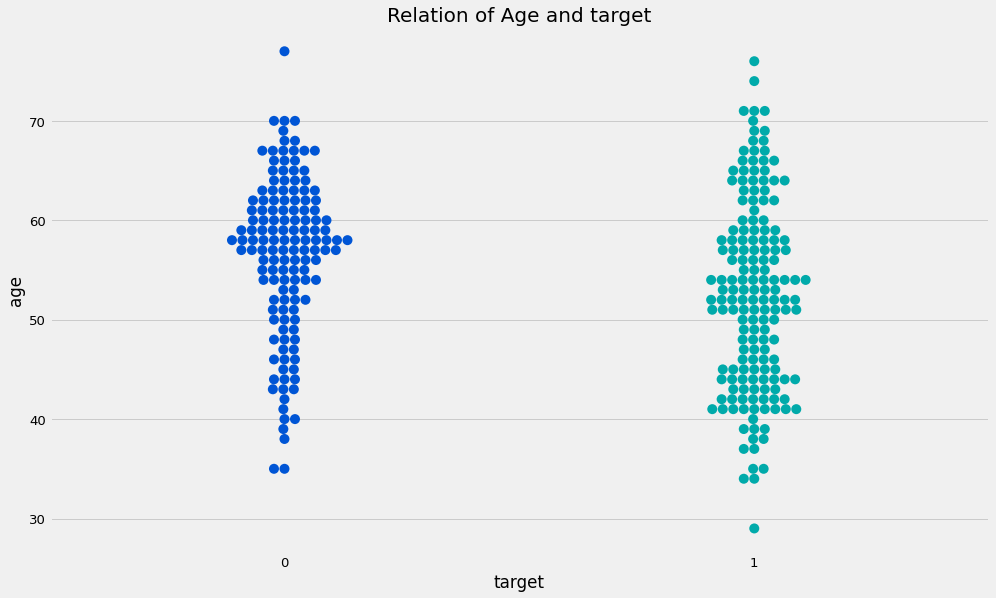

In [ ]:
plt.rcParams['figure.figsize'] = (15,9)
sns.swarmplot(df['target'], df['age'], palette='winter', size=10)
plt.title('Relation of Age and target', fontsize=20, fontweight=30)
plt.show()

**9.) RELATION OF TRESTBPS WITH GENDERS TO TARGET**

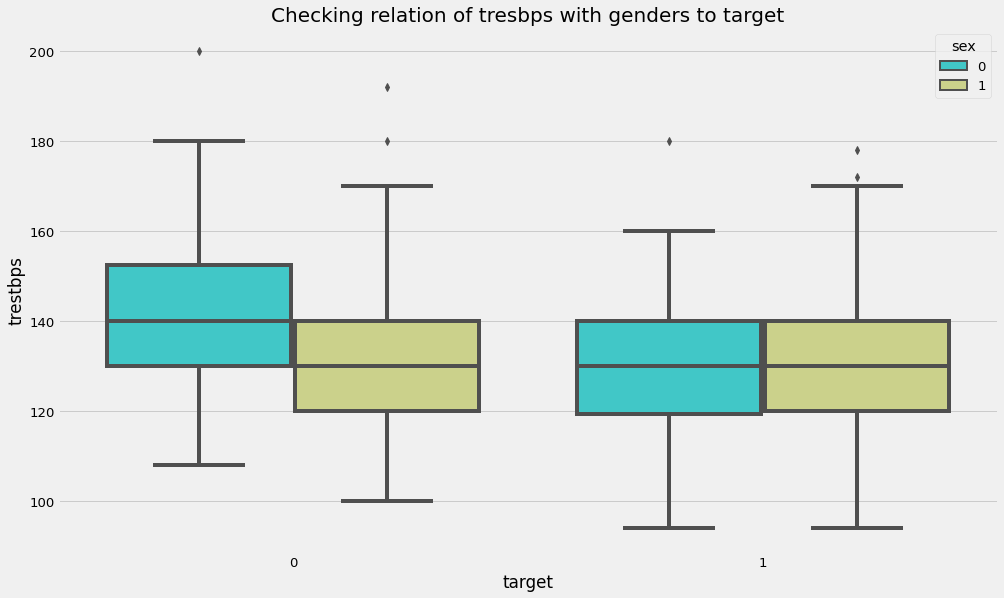

In [ ]:
sns.boxplot(x=df['target'], y = df['trestbps'], hue = df['sex'], palette = 'rainbow')
plt.title('Checking relation of tresbps with genders to target', fontsize=20, fontweight=30)
plt.show()

**10.) AGE ANALYSIS SYSTEM**

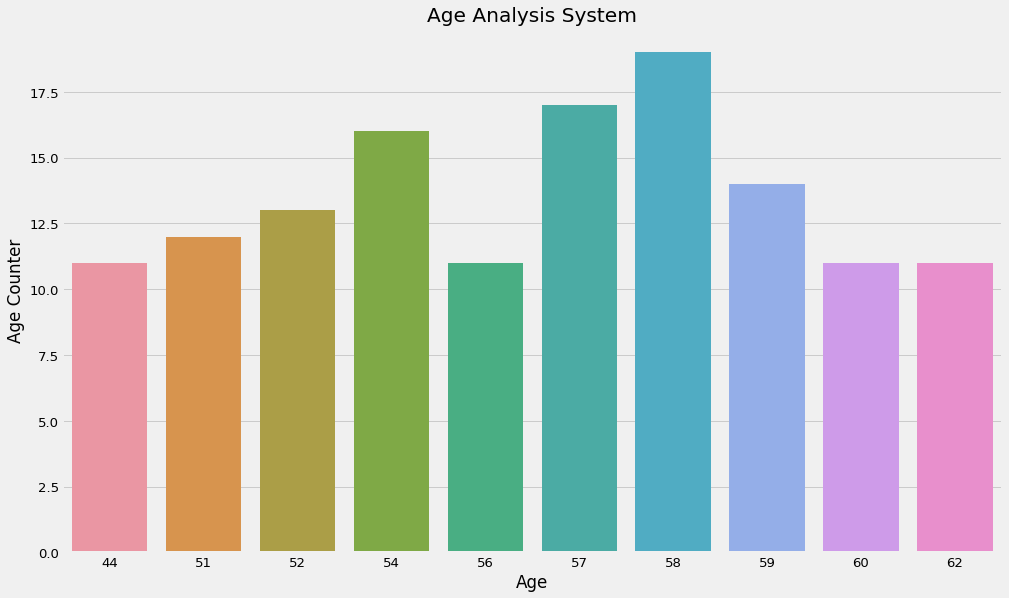

In [ ]:
#Age Analysis
df.age.value_counts()[:10]
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [ ]:
df15 = pd.read_csv('heart.csv')

**11.) FOUR TYPES OF CHEST PAIN**

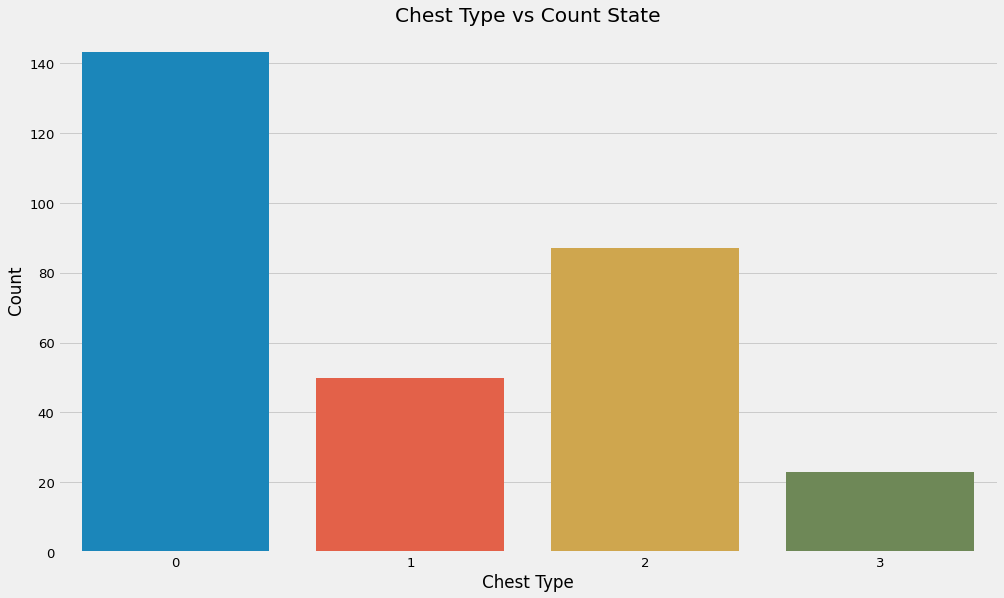

In [ ]:
#target vs cp
#As seen there are 4 types of chest pain
df15.cp.value_counts()

sns.countplot(df15.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

**12.) CP VS TARGET**

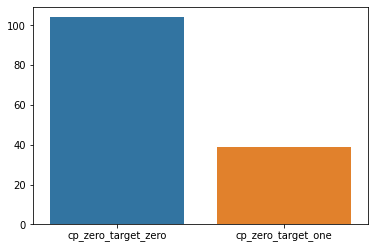

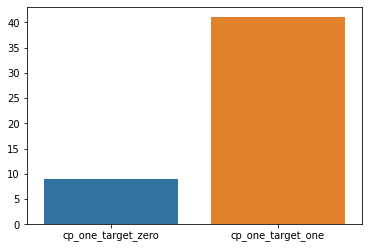

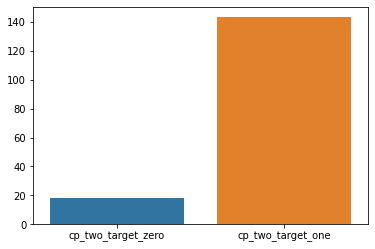

In [ ]:
cp_zero_target_zero=len(df[(df.cp==0)&(df.target==0)])
cp_zero_target_one=len(df[(df.cp==0)&(df.target==1)])
sns.barplot(x=['cp_zero_target_zero', 'cp_zero_target_one'], y =[cp_zero_target_zero,cp_zero_target_one])
plt.show()

cp_one_target_zero =len(df[(df.cp==1)&(df.target==0)])
cp_one_target_one=len(df[(df.cp==1)&(df.target==1)])
sns.barplot(x=['cp_one_target_zero', 'cp_one_target_one'], y=[cp_one_target_zero, cp_one_target_one])
plt.show()

cp_two_target_zero=len(df[(df.cp==2)&(df.target==0)])
cp_two_target_one=len(df[df.cp==2&(df.target==1)])

sns.barplot(x=['cp_two_target_zero', 'cp_two_target_one'], y=[cp_two_target_zero,cp_two_target_one])
plt.show()



**13.)TRESTBPS VS CHOL**

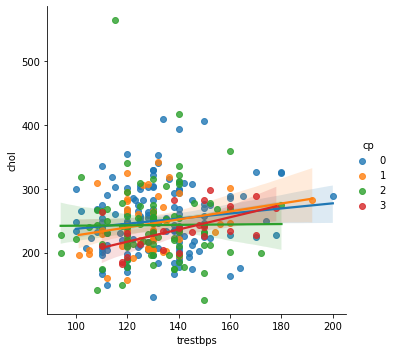

In [ ]:
#trestbps vs chol
sns.lmplot(x='trestbps', y='chol', data=df, hue='cp')
plt.show()

**14.) SEX VS OLDPEAK**

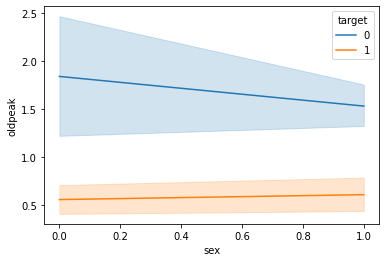

In [ ]:
#sex vs oldpeak
sns.lineplot(x='sex', y='oldpeak', hue='target', data=df)
plt.show()

**DATA PRE-PROCESSING** 

**1.) CATEGORICAL ENCODING**

In [ ]:
"""Categorical encoding (Creating Dummy Variables)"""
df =pd.get_dummies(df, columns=['cp','restecg','slope','ca','thal'],prefix=['cp','restecg','slope','ca','thal'],drop_first=True)


**2.) CREATION OF TARGET VARIABLE**

In [ ]:
#target values
y = df.target.values
X = df.drop(['target'],axis=1)

**3.) STANDARD SCALING**

In [ ]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
To_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[To_scale] = ss.fit_transform(X[To_scale])

**4.) TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

***dataset does not consist of null values**





In [ ]:
#transposing the matrix
X_train = X_train.T
X_test = X_test.T
y_train = y_train
y_test = y_test.T
print(X_train.T)
print(X_train)

accuracies = {}

          age  sex  trestbps      chol  fbs  ...  ca_3  ca_4  thal_1  thal_2  thal_3
74  -1.253580  0.0 -0.549641 -0.642843  0.0  ...   0.0   0.0     0.0     1.0     0.0
153  1.283063  0.0  0.821069  0.613313  0.0  ...   0.0   0.0     0.0     1.0     0.0
64   0.400752  1.0  0.478391 -0.681494  1.0  ...   0.0   0.0     0.0     1.0     0.0
296  0.952197  0.0 -0.435415 -0.952051  0.0  ...   0.0   0.0     0.0     1.0     0.0
287  0.290464  1.0  1.277972 -0.275659  0.0  ...   0.0   0.0     0.0     1.0     0.0
..        ...  ...       ...       ...  ...  ...   ...   ...     ...     ...     ...
251 -1.253580  1.0  0.021488  0.014223  1.0  ...   0.0   1.0     0.0     0.0     1.0
192 -0.040403  1.0 -0.663867 -1.125980  0.0  ...   0.0   0.0     0.0     0.0     1.0
117  0.180175  1.0 -0.663867 -1.029353  0.0  ...   0.0   0.0     0.0     0.0     1.0
47  -0.812425  1.0  0.364165  0.207478  0.0  ...   0.0   0.0     0.0     1.0     0.0
172  0.400752  1.0 -0.663867  0.729266  0.0  ...   0.0   0.0     

**Model Training and Testing**

**1.) LOGISTIC REGRESSION**

In [ ]:
"""Logistic Regression """
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train.T,y_train.T)
acc = lr.score(X_test.T, y_test.T)*100
accuracies['Logistic Regression'] = acc
print("Accuracy {:.2f}%".format(acc))

Accuracy 90.16%


In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, X_train.T, y_train.T,cv=3)

[[ 87  24]
 [ 18 113]]


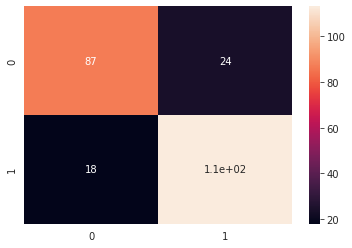

In [ ]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print('Report : ')
print(classification_report(y_train, y_pred))
auc = roc_auc_score(y_train, y_pred)
print(auc)

Report : 
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       111
           1       0.82      0.86      0.84       131

    accuracy                           0.83       242
   macro avg       0.83      0.82      0.82       242
weighted avg       0.83      0.83      0.83       242

0.823189601815556


**2.) K NEAREST NEIGHBORS**

In [ ]:
""" K nearest neighbours"""
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train.T, y_train.T)

score_1 = knn.score(X_test.T, y_test.T)*100
print("Accuracy of 2NN {:.2f}%".format(score_1))

Accuracy of 2NN 83.61%


finding best K-value

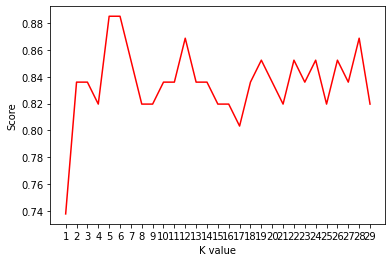

Accuracy of KNN 88.52%


In [ ]:
#finding best k value
knn_list = []
for i in range(1, 30):
  knn_2 = KNeighborsClassifier(n_neighbors=i)
  knn_2.fit(X_train.T, y_train.T)
  knn_list.append(knn_2.score(X_test.T, y_test.T))

#plotting the knn
plt.plot(range(1,30), knn_list, color='red')
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(knn_list) * 100
accuracies['KNN'] = acc
print('Accuracy of KNN {:.2f}%'.format(acc))

**3.) SUPPORT VECTOR MACHINE**

In [ ]:
""" Support Vector Machine """
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train.T, y_train.T)
acc = svm.score(X_test.T, y_test.T)*100

accuracies['SVM'] = acc
print("Accuracy of SVM {:.2f}%".format(acc))

Accuracy of SVM 85.25%


**4.) DECISION TREE**

In [ ]:
""" Decision Trees """
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train.T, y_train.T)

acc = dtc.score(X_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print('"Accuracy of Decision Tree {:.2f}%'.format(acc))

"Accuracy of Decision Tree 72.13%


**5.) ENSEMBLE LEARNING**

In [ ]:
StackAccuracy = pd.DataFrame((svm.predict(X_test.T)+ dtc.predict(X_test.T) + knn.predict(X_test.T) + lr.predict(X_test.T)))
finalAccuracy=StackAccuracy.applymap(lambda x: 1if x > 0.5 else 0)
from sklearn.metrics import accuracy_score
print('Accuracy : ', accuracy_score(finalAccuracy, y_test))

Accuracy :  0.8524590163934426


**6.) COMPARISON CHART OF MODELS**

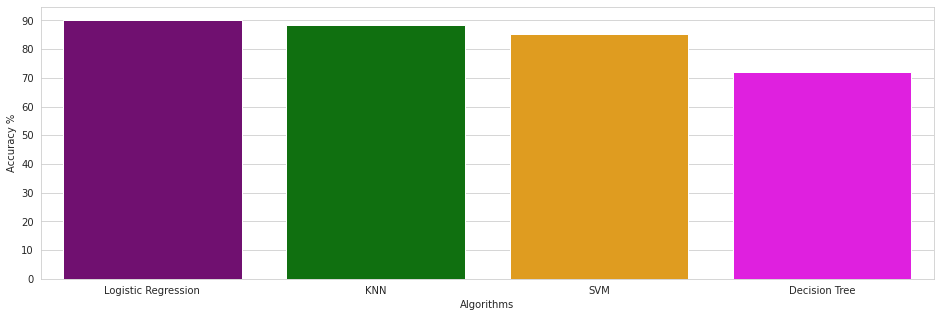

In [ ]:
#Comparing colors
colors = ["purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1


In [ ]:
std_sclr = StandardScaler().fit(df1.drop('target', axis=1))

In [ ]:
X = std_sclr.transform(df1.drop('target', axis=1))

In [ ]:
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**7.) RANDOM FOREST CLASSIFIER WITHOUT GRID SEARCH** - overfitting issues, Not giving generalized results

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())
print('Train Score: {}'.format(rf.score(X_train, y_train.values.ravel())))

Train Score: 1.0


In [ ]:
y_pred = rf.predict(X_test)
print('Test Score: {}'.format(accuracy_score(y_test, y_pred)))

Test Score: 0.8688524590163934


**8.) RANDOM FOREST CLASSIFIER AFTER HYPERTUNING VARIABLES USING GRID SEARCH**- Not giving overfitting results, better performance

In [ ]:
#hypertuning
est = RandomForestClassifier()
param_grid = {
    'max_depth' : range(2, 7),
    'n_estimators': range(10, 30)
}

In [ ]:
grid_search_rf = GridSearchCV(
    estimator=est,
    param_grid=param_grid,
)

grid_search_rf.fit(X_train, y_train)

print('Best Parameters were: {}'.format(grid_search_rf.best_params_))
print('Best CrossVal Score was: {}'.format(grid_search_rf.best_score_))

Best Parameters were: {'max_depth': 3, 'n_estimators': 29}
Best CrossVal Score was: 0.8388605442176871


In [ ]:
rf_clf = RandomForestClassifier(
    max_depth = 3,
    n_estimators = 29
)

rf_clf.fit(
    X_train,
    y_train.values.ravel()
)

y_pred_rf = rf_clf.predict(X_test)
print('Random Forrest Accuracy: {}'.format(accuracy_score(y_test, y_pred_rf)))

Random Forrest Accuracy: 0.8524590163934426


In [ ]:
df3 = df.copy()

**BOOSTING METHODS** - XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
df4 = df.copy()

In [ ]:
df4 = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'],
                     prefix=['cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)


In [ ]:
y = df4.target.values
X= df4.drop(['target'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
To_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[To_scale] = ss.fit_transform(X[To_scale])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [ ]:
from sklearn.metrics import accuracy_score
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
preds = xgb_cl.predict(X_test)
accuracy_score(y_test, preds)

0.8852459016393442

# **BOOSTING METHOD - CATBoost**

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
df5 = df.copy()

In [ ]:
y = df5.target.values
X= df5.drop(['target'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
model = CatBoostClassifier(iterations=100,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
model.fit(X_train, y_train)

0:	learn: 0.5491343	total: 308us	remaining: 30.5ms
1:	learn: 0.4671265	total: 579us	remaining: 28.4ms
2:	learn: 0.4243921	total: 3.23ms	remaining: 104ms
3:	learn: 0.3881722	total: 4.07ms	remaining: 97.7ms
4:	learn: 0.3580831	total: 4.72ms	remaining: 89.7ms
5:	learn: 0.3487737	total: 5.33ms	remaining: 83.5ms
6:	learn: 0.3343647	total: 5.9ms	remaining: 78.4ms
7:	learn: 0.3282813	total: 6.38ms	remaining: 73.4ms
8:	learn: 0.3168901	total: 7.29ms	remaining: 73.7ms
9:	learn: 0.3068239	total: 8.5ms	remaining: 76.5ms
10:	learn: 0.2966420	total: 9.42ms	remaining: 76.3ms
11:	learn: 0.2931880	total: 10.2ms	remaining: 74.8ms
12:	learn: 0.2847382	total: 10.4ms	remaining: 69.9ms
13:	learn: 0.2773485	total: 10.7ms	remaining: 65.7ms
14:	learn: 0.2766853	total: 10.9ms	remaining: 61.8ms
15:	learn: 0.2761457	total: 11.4ms	remaining: 59.7ms
16:	learn: 0.2756122	total: 11.8ms	remaining: 57.5ms
17:	learn: 0.2686075	total: 12.2ms	remaining: 55.6ms
18:	learn: 0.2657800	total: 12.6ms	remaining: 53.5ms
19:	lear

In [ ]:
model.score(X_test, y_test)

0.8688524590163934

**CATBoost with Grid Search - BEST RESULTS** 91.8%

In [ ]:
model = CatBoostClassifier(loss_function='Logloss')
grid = {'learning_rate' :  [0.3, 0.1],
        'depth' : [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train,
                                       cv=3, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
26:	learn: 0.0362319	test: 0.4260695	best: 0.3853323 (12)	total: 144ms	remaining: 5.18s
27:	learn: 0.0342075	test: 0.4351350	best: 0.3853323 (12)	total: 149ms	remaining: 5.17s
28:	learn: 0.0325340	test: 0.4337436	best: 0.3853323 (12)	total: 154ms	remaining: 5.15s
29:	learn: 0.0310225	test: 0.4341517	best: 0.3853323 (12)	total: 159ms	remaining: 5.14s
30:	learn: 0.0295891	test: 0.4352721	best: 0.3853323 (12)	total: 164ms	remaining: 5.13s
31:	learn: 0.0284324	test: 0.4341795	best: 0.3853323 (12)	total: 169ms	remaining: 5.12s
32:	learn: 0.0271986	test: 0.4377680	best: 0.3853323 (12)	total: 174ms	remaining: 5.11s
33:	learn: 0.0261001	test: 0.4384028	best: 0.3853323 (12)	total: 179ms	remaining: 5.09s
34:	learn: 0.0252184	test: 0.4380082	best: 0.3853323 (12)	total: 184ms	remaining: 5.08s
35:	learn: 0.0242917	test: 0.4356991	best: 0.3853323 (12)	total: 189ms	remaining: 5.06s
36:	learn: 0.0234443	test: 0.4387685	best: 0.3853323 (12)	total: 194m

In [ ]:
print(grid_search_result['params'])

{'depth': 4, 'learning_rate': 0.1}


In [ ]:
model = CatBoostClassifier(iterations=42,
                           depth=4,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=True)
model.fit(X_train, y_train)

0:	learn: 0.6660552	total: 441us	remaining: 18.1ms
1:	learn: 0.6459987	total: 1.28ms	remaining: 25.5ms
2:	learn: 0.6241118	total: 1.87ms	remaining: 24.3ms
3:	learn: 0.5996619	total: 2.21ms	remaining: 21ms
4:	learn: 0.5826021	total: 2.57ms	remaining: 19ms
5:	learn: 0.5628461	total: 2.9ms	remaining: 17.4ms
6:	learn: 0.5470984	total: 3.23ms	remaining: 16.2ms
7:	learn: 0.5315344	total: 3.55ms	remaining: 15.1ms
8:	learn: 0.5194801	total: 3.88ms	remaining: 14.2ms
9:	learn: 0.5067646	total: 4.29ms	remaining: 13.7ms
10:	learn: 0.4961986	total: 4.61ms	remaining: 13ms
11:	learn: 0.4859976	total: 4.92ms	remaining: 12.3ms
12:	learn: 0.4752458	total: 5.27ms	remaining: 11.7ms
13:	learn: 0.4640115	total: 5.65ms	remaining: 11.3ms
14:	learn: 0.4553191	total: 6ms	remaining: 10.8ms
15:	learn: 0.4468685	total: 6.65ms	remaining: 10.8ms
16:	learn: 0.4404806	total: 7.04ms	remaining: 10.3ms
17:	learn: 0.4343673	total: 7.54ms	remaining: 10.1ms
18:	learn: 0.4276953	total: 8.01ms	remaining: 9.7ms
19:	learn: 0.42

In [ ]:
model.score(X_test, y_test)

0.9180327868852459